<a href="https://colab.research.google.com/github/onyeogulu/Tensorflow-and-Pytorch-Project/blob/main/VGG16_Implemetation_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.nn.modules.activation import ReLU
from torch.nn.modules.linear import Linear
from torch.nn.modules import flatten
import torch
import numpy as np
from torch.utils.data import random_split
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt
%matplotlib inline
!conda install pytorch torchvision -c pytorch 
#install TensorFlow 2.0 
!pip install tensorflow
# Load the TensorBoard notebook extension
%load_ext tensorboard

/bin/bash: conda: command not found
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Implementation of VGG16 in pytorch 

In [ ]:
# Load dataset
transform= transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 64
trainset = torchvision.datasets.CIFAR10(root = './data',train = True,
                                       download = True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data',train = False,
                                       download = True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True, num_workers=2)

classes = ("plane","car","bird","cat","deer",'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
BATCH_SIZE=64
num_epochs=5
lr=1e-4
class_size=10

# Transform tensor to 224 by 224
tranform_train = transforms.Compose([transforms.Resize((224,224)), transforms.RandomHorizontalFlip(p=0.7), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
tranform_test = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

#prep the train, validation and test dataset
torch.manual_seed(2021)
train = torchvision.datasets.CIFAR10("data/", train=True, download=True, transform=tranform_train) 
val_size = 10000 
train_size = len(train) - val_size
train, val = random_split(train, [train_size, val_size]) 
test = torchvision.datasets.CIFAR10("data/", train=False, download=True, transform=tranform_test) 

#  train, val and test datasets to the dataloader
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val, batch_size=BATCH_SIZE, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
dataiter = iter(train_loader)
data = dataiter.next()
features, label = data
label = label.view(label.shape[0],1)
print(features.shape, label.shape)

torch.Size([64, 3, 224, 224]) torch.Size([64, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


images.shape: torch.Size([64, 3, 224, 224])


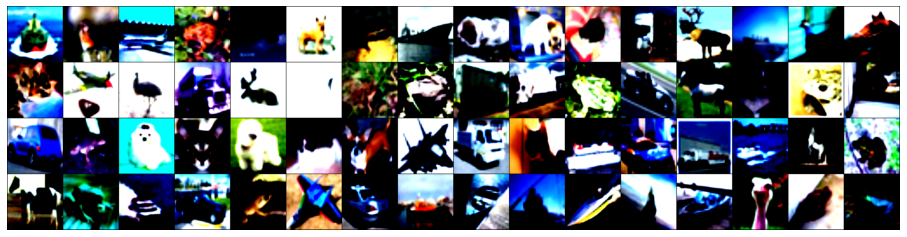

In [ ]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
for images, _ in train_loader:
    print('images.shape:', images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1, 2, 0)))
    break

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class VGG16(nn.Module):
  def __init__(self):
    super(VGG16,self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)

    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)

    self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
    self.conv6 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
    self.conv7 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)

    self.conv8 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
    self.conv9 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv10 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

    self.conv11 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv12 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)
    self.conv13 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1)

    self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc14 = nn.Linear(25088, 4096)
    self.fc15 = nn.Linear(4096, 4096)
    self.fc16 = nn.Linear(4096, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.relu(self.conv2(x))
    x = self.maxpool(x)
    x = F.relu(self.conv3(x))
    x = F.relu(self.conv4(x))
    x = self.maxpool(x)
    x = F.relu(self.conv5(x))
    x = F.relu(self.conv6(x))
    x = F.relu(self.conv7(x))
    x = self.maxpool(x)
    x = F.relu(self.conv8(x))
    x = F.relu(self.conv9(x))
    x = F.relu(self.conv10(x))
    x = self.maxpool(x)
    x = F.relu(self.conv11(x))
    x = F.relu(self.conv12(x))
    x = F.relu(self.conv13(x))
    x = self.maxpool(x)
    x = x.reshape(x.shape[0], -1)
    x = F.relu(self.fc14(x))
    x = F.dropout(x, 0.5) #dropout was included to combat overfitting
    x = F.relu(self.fc15(x))
    x = F.dropout(x, 0.5)
    x = self.fc16(x)
    return x
        
print(VGG16())

VGG16(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv9): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv10): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv11): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv12): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv13): Conv2d(512, 512, kernel_size=(3, 3),

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
model = VGG16() 
model = model.to(device=device) 
load_model = True
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= lr) 

In [ ]:
for epoch in range(num_epochs): #I decided to train the model for 50 epochs
    loss_var = 0
    
    for idx, (images, labels) in enumerate(train_loader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        model.train()
        ## Forward Pass
        scores = model(images)
        loss = criterion(scores,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_var += loss.item()
        if idx%64==0:
            print(f'Epoch: [{epoch+1}/{num_epochs}] || Step [{idx+1}/{len(train_loader)}] || Loss:{loss_var/len(train_loader)}')
    print(f"Loss at epoch {epoch+1} || {loss_var/len(train_loader)}")

    with torch.no_grad():
        correct = 0
        samples = 0
        for idx, (images, labels) in enumerate(val_loader):
            images = images.to(device=device)
            labels = labels.to(device=device)
            outputs = model(images)
            _, preds = outputs.max(1)
            correct += (preds == labels).sum()
            samples += preds.size(0)
            print(f"Accuracy: {float(correct) / float(samples) * 100:.2f} percentage || Correct {correct} out of {samples} samples")

    with torch.no_grad():
      correct = 0
      samples = 0
      for idx, (images, labels) in enumerate(testloader):
        images = images.to(device=device)
        labels = labels.to(device=device)
        outputs = model(images)
        _, preds = outputs.max(1)
        correct += (preds == labels).sum()
        samples += preds.size(0)
        print(f"Accuracy: {float(correct) / float(samples) * 100:.2f} percentage || Correct {correct} out of {samples} samples")


Epoch: [1/5] || Step [1/625] || Loss:0.0036858467102050783
Epoch: [1/5] || Step [65/625] || Loss:0.23952142944335938
Epoch: [1/5] || Step [129/625] || Loss:0.47150926246643066
Epoch: [1/5] || Step [193/625] || Loss:0.6799509269714356
Epoch: [1/5] || Step [257/625] || Loss:0.874114630317688
Epoch: [1/5] || Step [321/625] || Loss:1.0571708276748657
Epoch: [1/5] || Step [385/625] || Loss:1.2300432788848876
Epoch: [1/5] || Step [449/625] || Loss:1.394686290359497


KeyboardInterrupt: ignored

In [ ]:
while True:
  pass